In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline


## 1.(a)Download the Combined Cycle Power Plantdata.

In [2]:
!git clone 'https://github.com/seongohr/ML.git'
fileName = 'Folds5x2_pp.xlsx'

df = pd.read_excel(fileName, index_col=None)
print(df.head())
df_info = df.describe()
print(df_info)

fatal: destination path 'ML' already exists and is not an empty directory.
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


## 1. (b) i. How many rows? 
###          answer : 9568
##         How many columns? 
###          answer : 5
##         What do the rows and columns represent?
###           answer : 
###           -  rows : hourly observed average ambient variables set
###           - columns : Four of them(AT- average temperature, V - Exhaust Vacumn, AP - Ambient Pressure, RH - Relative Humidity) are variables which are called predictors or independent variables and the last column (PE - energy output of the plant) which is called response or dependent variable.


## 1. (b)-ii. scatterplots and describe your finding.
### Among all the scatter plots, I can guess that there would be some associations between variables cause I can find some patterns and some of them( ex. AT and V, AT and PE, V and PE)shows pretty obvious patterns compared to others.

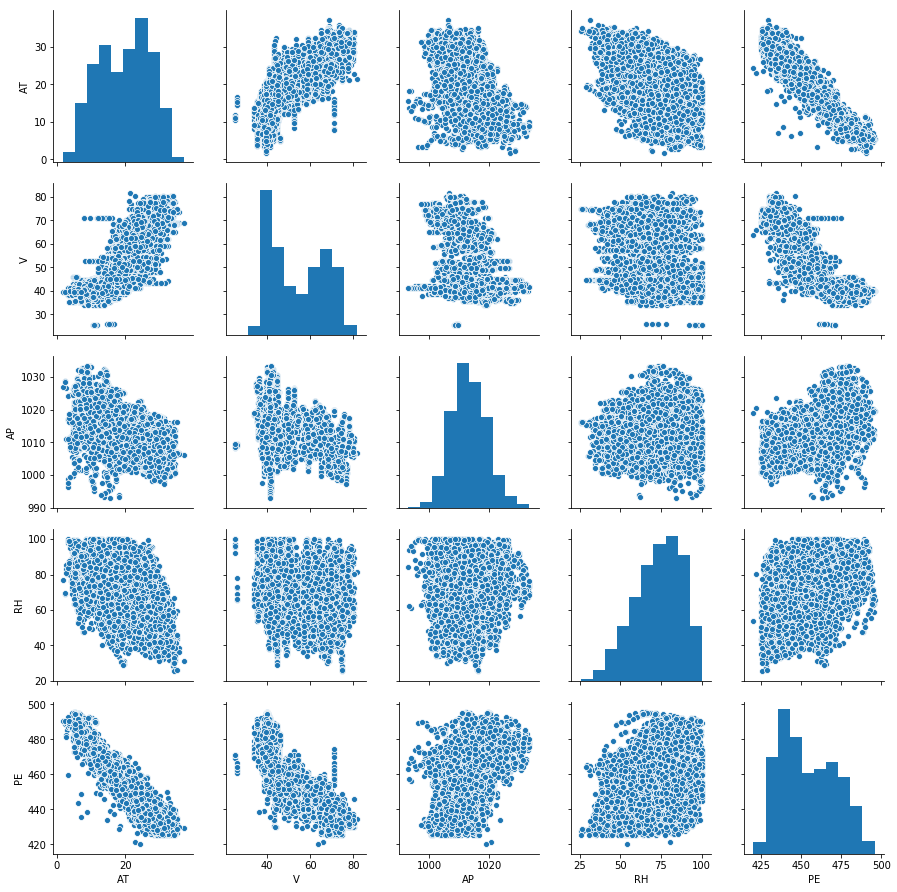

In [3]:
sns.pairplot(df)
plt.show()

##      1. (b)-iii. Summarize the mean, median, range, first and third quartiles, and interquartile ranges in a table.

In [4]:
#print(df_info,'\n')

df_info.loc['range'] = df_info.loc['max',]-df_info.loc['min']
df_info.loc['interquartile range'] = df_info.loc['75%'] - df_info.loc['25%']
df_info.rename(index={'25%':'first quartile','50%':'median', '75%':'third quartile'}, inplace=True)
df_info = df_info.drop(['count', 'std', 'min', 'max'], axis = 0)
print(df_info)


                            AT          V           AP         RH          PE
mean                 19.651231  54.305804  1013.259078  73.308978  454.365009
first quartile       13.510000  41.740000  1009.100000  63.327500  439.750000
median               20.345000  52.080000  1012.940000  74.975000  451.550000
third quartile       25.720000  66.540000  1017.260000  84.830000  468.430000
range                35.300000  56.200000    40.410000  74.600000   75.500000
interquartile range  12.210000  24.800000     8.160000  21.502500   28.680000


## 1.(c) fit a simple linear regression model to predict the response.
## In which  of the models is there a statistically significant association between the predictor and the response?
### Answer : When we see the p-values, all the models have statistically significant association between the predictorsand the response because all of the p-values are less than 0.05. If we see the plots below, we can find the lines(patterns) which back up the assertion that there is a relationships between predictors and the response.

In [5]:
## preprocessing

y  = df['PE']
x = df.drop('PE', axis=1)
#print(x)
#print(y)

## split train set and test set
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#print('x_train',x_train)
#print('y_train',y_train)
#print('x_test',x_test)
#print('y_test',y_test)

In [6]:
linearRegressor = LinearRegression()
simpleMse = []

for i in range(len(df.columns) - 1):
    col = df.columns[i]
    X2 = sm.add_constant(x[[col]])
    est = sm.OLS(y, X2)
    est = est.fit()
    print(est.summary(),'\n')
    
    linearRegressor.fit(x[[col]], y)
    y_simple_Prediction = linearRegressor.predict(x[[col]])
    trainMSE = mean_squared_error(y, y_simple_Prediction)
    simpleMse.append((col,trainMSE))
    print('train MSE of ',col,' : ', trainMSE, '\n')
    
print(simpleMse)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:04   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Create some plots to back up your assertions.

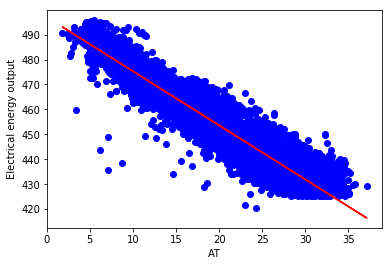

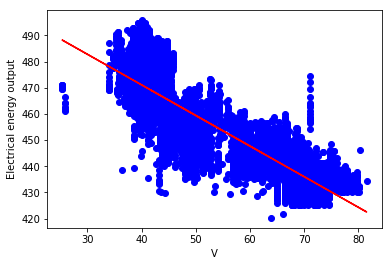

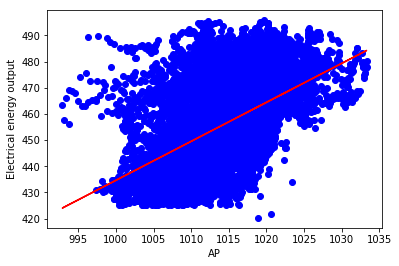

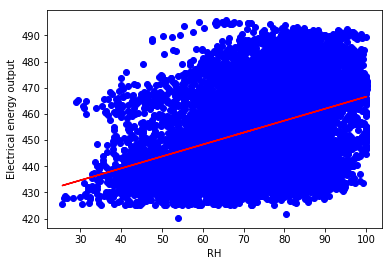

[('AT', 29.431702011093524), ('V', 70.91465103018828), ('AP', 212.9724998331263), ('RH', 246.99922809296348)]


In [7]:
linearRegressor = LinearRegression()
simpleCoefficients = []
sMse = []
idx=0

for i in range(len(df.columns) - 1):
    col = df.columns[i]
    linearRegressor.fit(x[[col]], y)
    y_simple_Prediction = linearRegressor.predict(x[[col]])
    trainMSE = mean_squared_error(y, y_simple_Prediction)
   
    plt.scatter(x[col], y, color = 'blue')
    plt.plot(x[col], y_simple_Prediction, color = 'red')
    plt.xlabel(col)
    plt.ylabel('Electrical energy output')
    plt.show()
    temp = linearRegressor.coef_
    simpleCoefficients.append(temp[0])
    sMse.append((col, trainMSE))
    
print(sMse)

### Are there any outliers that you would like to remove from your data for each of these regression tasks?
### Answer :  Yes. In the plots above, we can find some data far from densed mass of data. If we remove these data(outliers), the accuracy of the model could be higher and MSE could be lower. But all the predictors are already significant so removing outliers cannot decide on whether predictors are significant or not.


## 1.(d) Fit a multiple regression model. Describe your results. For which predictors can we reject the null hypothesis?
### Answer : When I checked the p-values, all of them are small enough(0.000 and less than 0,05) to be sinificant. Therefore, all the predictors -AT, V, AP, RH - can reject the null hypothesis. And in terms of MSE, it's smaller than each of the simple regression models above so multiple regression model fits better than simple linear regression models. When we see the R-squared value, it is also higher than those of all the simple linear regression models. 

In [8]:
x3 = sm.add_constant(x)
est = sm.OLS(y, x3)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:06   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
multiLinearRegressor = LinearRegression()
multiLinearRegressor.fit(x, y)
y_multi_Prediction = multiLinearRegressor.predict(x)
multiTrainMSE = mean_squared_error(y, y_multi_Prediction)
print('multiple regression model MSE : ', multiTrainMSE)


multiple regression model MSE :  20.767397532535014


## 1.(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariable regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.

                   AT         V        AP        RH
simple LR   -2.171320 -1.168135  1.489872  0.455650
multiple LR -1.977513 -0.233916  0.062083 -0.158054


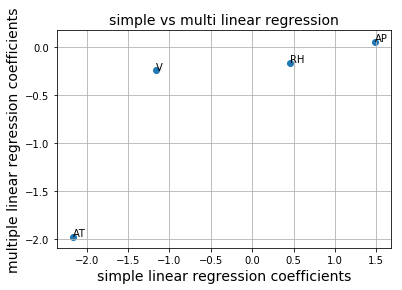

In [10]:
multiCoefficients = multiLinearRegressor.coef_
coefficients = np.append([simpleCoefficients], [multiCoefficients], axis=0)
coefficients = pd.DataFrame(coefficients, columns=['AT', 'V', 'AP', 'RH']).transpose()
coefficients.columns = ['simple LR', 'multiple LR']
coefficients = coefficients.transpose()
print(coefficients)
plt.scatter(coefficients.loc['simple LR'], coefficients.loc['multiple LR'])
plt.title('simple vs multi linear regression', fontsize=14)
plt.xlabel('simple linear regression coefficients', fontsize=14)
plt.ylabel('multiple linear regression coefficients', fontsize=14)
plt.grid(True)
for col in coefficients.columns :
    plt.text(coefficients.loc[['simple LR'],[col]].values,coefficients.loc[['multiple LR'],[col]].values,col,horizontalalignment='left')

plt.show()

## 1.(f) Is there evidence of nonlinear association between any of the predictors and the reponse? 
### Answer : Yes, when we check all the p values below, we can see most of them are less than 0.05 which means significant so all the predictors have nonlinear association with the response. If p values of a predictor is higher than 0,05 then, we can think of it not significant and can remove it.
### evidence of nonlinear association : Except for the predictor V^2, all the predictors( AT, AT^2, AT^3, V, V^3, AP, AP^2, AP^3, RH, RH^2, RH^3) looks that they are associated with response.

In [11]:
nonLinearRegressor = LinearRegression()
nonLmMSE = []

for col in x.columns :
    nl_train_numpy = x[col].values

    nl_train_df = x.filter([col], axis = 1)
    nl_train_df[col+'^2'] = np.power(nl_train_numpy, 2)
    nl_train_df[col+'^3'] = np.power(nl_train_numpy, 3)

    nl_x = sm.add_constant(nl_train_df)
    nl_est = sm.OLS(y, nl_x)
    nl_est = nl_est.fit()
    print(nl_est.summary(), '\n')
    
    nonLinearRegressor.fit(nl_train_df, y)
    y_nonLm_Prediction = nonLinearRegressor.predict(nl_train_df)
    nonLmTrainMSE = mean_squared_error(y, y_nonLm_Prediction)
    nonLmMSE.append((col, nonLmTrainMSE))
    print('non linear regression model MSE (',col,') : ', nonLmTrainMSE, '\n')

print('non linear regression model MSE : ', nonLmMSE)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:06   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/RyooSeongoh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.(g) Is there evidence of association of interactions of predictors with the response? Run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

### Answer : When we check the p values of interaction terms, the p values of AT*AP, AT*RH, V*AP, and  AP*RH are smaller than 0.05 so we can say those terms are statistically significantly associated with the response. Especially AT*RH and V*AP have 0.000 p values, therefore those interactions predictors are strongly associated with response.

In [12]:
interLm = PolynomialFeatures(degree=2, interaction_only=True)
interX_train = interLm.fit_transform(x)
print('column order : ', interLm.get_feature_names(x.columns), '\n')
interLm_est = sm.OLS(y, interX_train)
interLm_est = interLm_est.fit()
print(interLm_est.summary())



column order :  ['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP', 'V RH', 'AP RH'] 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:06   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [13]:
## compute MSE
interLinearRegressor = LinearRegression()
interLinearRegressor.fit(interX_train, y)
y_interLm_Prediction = interLinearRegressor.predict(interX_train)
interLmTrainMSE = mean_squared_error(y, y_interLm_Prediction)

print('linear regression model with interaction terms MSE : ', interLmTrainMSE, '\n')

linear regression model with interaction terms MSE :  18.55106888539468 



## 1.(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values. Test both models on the remaining points and report your train and test MSEs.

### Train the regression model on a randomly selected 70% subset of the data with all predictors.

In [14]:
## split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print('x_train\n', x_train.head(), '\n')
print('x_test\n', x_test.head(), '\n')
print('y_train\n', y_train.head(), '\n')
print('y_test\n', y_test.head(), '\n')

## train the multiple linear regression model
multiLinearRegressor = LinearRegression()
multiLinearRegressor.fit(x_train, y_train)

y_train_prediction = multiLinearRegressor.predict(x_train)
trainMSE = mean_squared_error(y_train, y_train_prediction)

y_test_Prediction = multiLinearRegressor.predict(x_test)
testMSE = mean_squared_error(y_test, y_test_Prediction)

#print('train MSE : ', trainMSE)
#print('test MSE : ', testMSE)

mseSets = pd.DataFrame({'train MSE':[trainMSE], 'test MSE':[testMSE]})
mseSets.rename(index = {0: "linear model"}, inplace = True)
print(mseSets)

x_train
          AT      V       AP     RH
4507  15.83  41.67  1013.39  74.12
287   22.56  62.26  1012.11  63.16
4018  22.11  59.80  1016.86  70.14
4624  19.96  56.03  1020.59  64.95
8507  21.70  70.32  1009.12  91.30 

x_test
          AT      V       AP     RH
4834  28.66  77.95  1009.56  69.07
1768  17.48  49.39  1021.51  84.53
2819  14.86  43.14  1019.21  99.14
7779  22.46  58.33  1013.21  68.68
7065  18.38  55.28  1020.22  68.33 

y_train
 4507    464.93
287     445.33
4018    450.62
4624    454.67
8507    438.52
Name: PE, dtype: float64 

y_test
 4834    431.23
1768    460.01
2819    461.14
7779    445.90
7065    451.29
Name: PE, dtype: float64 

              train MSE   test MSE
linear model  20.941564  20.368383


### Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values.
#### (I made two models because I was not sure which model is right one : pairwise interaction terms with quadratic predictors, or all possible combinations of interaction terms with quadratic predictors)
###  1 - pairwise interaction terms with quadratic predictors = ['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH', 'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2']

In [24]:
##spliting data
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

quadraticLm = PolynomialFeatures(degree=2)
quadratic_train = quadraticLm.fit_transform(x_train)
quadratic_test = quadraticLm.fit_transform(x_test)
print('Column orders : ', quadraticLm.get_feature_names(x_train.columns), '\n')

quadraticLm_est = sm.OLS(y_train, quadratic_train)
quadraticLm_est = quadraticLm_est.fit()
print('Original model: \n', quadraticLm_est.summary(), '\n')

## removing insignificant variables
# 1st removing(term V*RH)
quadratic_train = np.delete(quadratic_train, 11, axis = 1)
quadratic_test = np.delete(quadratic_test, 11, axis = 1)

quadraticLm_est = sm.OLS(y_train, quadratic_train)
quadraticLm_est = quadraticLm_est.fit()
print('After 1st removing(term V*RH): \n', quadraticLm_est.summary(), '\n')

# 2nd removing(term V^2)
quadratic_train = np.delete(quadratic_train, 9, axis = 1)
quadratic_test = np.delete(quadratic_test, 9, axis = 1)

quadraticLm_est = sm.OLS(y_train, quadratic_train)
quadraticLm_est = quadraticLm_est.fit()
print('After 2nd removing(term V^2): \n', quadraticLm_est.summary(), '\n')

## 3rd removing(term AT*AP)
quadratic_train = np.delete(quadratic_train, 7, axis = 1)
quadratic_test = np.delete(quadratic_test, 7, axis = 1)

quadraticLm_est = sm.OLS(y_train, quadratic_train)
quadraticLm_est = quadraticLm_est.fit()
print('After 3rd removing(term AT*AP): \n', quadraticLm_est.summary(), '\n')

Column orders :  ['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH', 'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'] 

Original model: 
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:44:23   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

In [16]:
## train the improved regression model
improvedLinearRegressor = LinearRegression()
improvedLinearRegressor.fit(quadratic_train, y_train)

y_improved_train_prediction = improvedLinearRegressor.predict(quadratic_train)
improved_trainMSE = mean_squared_error(y_train, y_improved_train_prediction)

y_improved_test_Prediction = improvedLinearRegressor.predict(quadratic_test)
improved_testMSE = mean_squared_error(y_test, y_improved_test_Prediction)

#print('improved train MSE : ', improved_trainMSE)
#print('improved test MSE : ', improved_testMSE)

mseSets.loc['improved model'] = [improved_trainMSE, improved_testMSE]

### 2 - all possible interaction terms with quadratic predictors = ['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP', 'V RH', 'AP RH', 'AT V AP', 'AT V RH', 'AT AP RH', 'V AP RH', 'AT V AP RH', 'AT^2', 'V^2', 'AP^2', 'RH^2']


In [17]:
allInter = PolynomialFeatures(degree=4, interaction_only=True)
x_allInter_train = allInter.fit_transform(x_train)
#print('Column orders : ', allInter.get_feature_names(x_train.columns), '\n')
tmp = np.square(x_train.AT.values).reshape(-1,1)
x_allInter_train = np.append(x_allInter_train, tmp, axis = 1)
tmp = np.square(x_train.V.values).reshape(-1,1)
x_allInter_train = np.append(x_allInter_train, tmp, axis = 1)
tmp = np.square(x_train.AP.values).reshape(-1,1)
x_allInter_train = np.append(x_allInter_train, tmp, axis = 1)
tmp = np.square(x_train.RH.values).reshape(-1,1)
x_allInter_train = np.append(x_allInter_train, tmp, axis = 1)

x_allInter_test = allInter.fit_transform(x_test)
tmp = np.square(x_test.AT.values).reshape(-1,1)
x_allInter_test = np.append(x_allInter_test, tmp, axis = 1)
tmp = np.square(x_test.V.values).reshape(-1,1)
x_allInter_test = np.append(x_allInter_test, tmp, axis = 1)
tmp = np.square(x_test.AP.values).reshape(-1,1)
x_allInter_test = np.append(x_allInter_test, tmp, axis = 1)
tmp = np.square(x_test.RH.values).reshape(-1,1)
x_allInter_test = np.append(x_allInter_test, tmp, axis = 1)

allInterLm_est = sm.OLS(y_train, x_allInter_train)
allInterLm_est = allInterLm_est.fit()
print('Original model: \n', allInterLm_est.summary(), '\n')

## removing insignificant variables
# 1st removing(term V^2)
x_allInter_train = np.delete(x_allInter_train, 17, axis = 1)
x_allInter_test = np.delete(x_allInter_test, 17, axis = 1)

allInterLm_est = sm.OLS(y_train, x_allInter_train)
allInterLm_est = allInterLm_est.fit()
print('After 1st removing(term V^2): \n', allInterLm_est.summary(), '\n')

#print(x_allInter_train)
#print(x_allInter_test)

## train the improved regression model
improved2_LinearRegressor = LinearRegression()
improved2_LinearRegressor.fit(x_allInter_train, y_train)

y_improved2_train_prediction = improved2_LinearRegressor.predict(x_allInter_train)
improved2_trainMSE = mean_squared_error(y_train, y_improved2_train_prediction)

y_improved2_test_Prediction = improved2_LinearRegressor.predict(x_allInter_test)
improved2_testMSE = mean_squared_error(y_test, y_improved2_test_Prediction)

print('improved2 train MSE : ', improved2_trainMSE)
print('improved2 test MSE : ', improved2_testMSE)

mseSets.loc['improved2 model'] = [improved2_trainMSE, improved2_testMSE]


Original model: 
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     5317.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:07   Log-Likelihood:                -19184.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6677   BIC:                         3.855e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4332.6379   1782.990  

###  report your train and test MSEs.

In [18]:
print(mseSets)

                 train MSE   test MSE
linear model     20.941564  20.368383
improved model   18.370470  17.532699
improved2 model  18.018247  17.054108


## (i) KNN Regression :
## i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [19]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import mean_squared_error
#import math

def KNNRegression(xTrain, xTest, yTrain, yTest, raw) :
    k = list(range(1, 101, 1))
    errorsSets=[]
    reverseK = []
    
    min_train_error = math.inf
    min_test_error = math.inf
    best_train_K = k[0]
    best_test_K = k[0]
    
    for num in k:
        if raw:
            KNR = KNeighborsRegressor(n_neighbors=num)
        else:
            KNR = make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors=num))
        KNR.fit(xTrain, yTrain) 
        y_train_pred = KNR.predict(xTrain)
        y_test_pred = KNR.predict(xTest)
        trainError = mean_squared_error(yTrain, y_train_pred)
        testError = mean_squared_error(yTest, y_test_pred)
        
        
        if(min_train_error > trainError) :
            min_train_error = trainError
            best_train_K = num
        
        if(min_test_error > testError) :
            min_test_error = testError
            best_test_K = num
        
        errorsSets.append((1/num, trainError,testError))
    errorsSetsDf = pd.DataFrame(errorsSets, columns=['1/k value', 'train error', 'test error'])
    return best_test_K, errorsSetsDf, min_test_error, best_train_K, min_train_error





In [20]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print('x_train\n', x_train.head())
print('y_train\n', y_train.head())
print('x_test\n', x_test.head())
print('y_test\n', y_test.head())

x_train
          AT      V       AP     RH
4507  15.83  41.67  1013.39  74.12
287   22.56  62.26  1012.11  63.16
4018  22.11  59.80  1016.86  70.14
4624  19.96  56.03  1020.59  64.95
8507  21.70  70.32  1009.12  91.30
y_train
 4507    464.93
287     445.33
4018    450.62
4624    454.67
8507    438.52
Name: PE, dtype: float64
x_test
          AT      V       AP     RH
4834  28.66  77.95  1009.56  69.07
1768  17.48  49.39  1021.51  84.53
2819  14.86  43.14  1019.21  99.14
7779  22.46  58.33  1013.21  68.68
7065  18.38  55.28  1020.22  68.33
y_test
 4834    431.23
1768    460.01
2819    461.14
7779    445.90
7065    451.29
Name: PE, dtype: float64


### raw data

In [21]:
best_raw_k, rawErrorsSets, best_raw_test_error, best_raw_train_k, best_raw_train_error = KNNRegression(x_train, x_test, y_train, y_test, 1)
print('best k in raw test data : ',best_raw_k)
print('smallest test error : ', best_raw_test_error)
print('best k in raw train data : ',best_raw_train_k)
print('smallest train error : ', best_raw_train_error)
#print('rawErrorsSets\n',rawErrorsSets)

best k in raw test data :  5
smallest test error :  15.6635051689307
best k in raw train data :  1
smallest train error :  0.0


### normalized data

In [22]:
best_normal_k, normalErrorsSets, best_normal_test_error, best_normal_train_K, best_normal_train_error = KNNRegression(x_train, x_test, y_train, y_test, 0)
print('\nbest k in normalized test data : ',best_normal_k)
print('smallest normalized test error : ', best_normal_test_error)
print('best k in normalized  train data : ',best_normal_train_K)
print('smallest train error : ', best_normal_train_error)



best k in normalized test data :  6
smallest normalized test error :  13.938621450133523
best k in normalized  train data :  1
smallest train error :  0.0


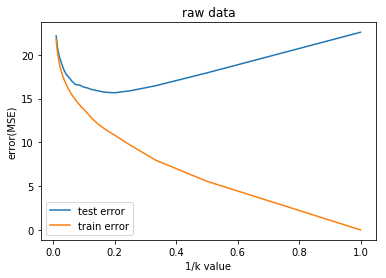

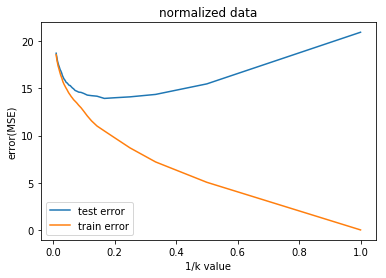

In [23]:
## plot
rawTest = sns.lineplot(x="1/k value", y="test error", data=rawErrorsSets, label="test error")
rawTrain = sns.lineplot(x="1/k value", y="train error", data=rawErrorsSets, label = "train error")
plt.title('raw data')
plt.ylabel('error(MSE)')
plt.show()

norTest = sns.lineplot(x="1/k value", y="test error", data=normalErrorsSets, label="test error")
norTrain = sns.lineplot(x="1/k value", y="train error", data=normalErrorsSets, label = "train error")
plt.title('normalized data')
plt.ylabel('error(MSE)')
plt.show()

## 1.(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.
### Answer : 
### smallest test error in KNN Regression :  13.938621450133523
### smallest test error in linear regression model : 
### - when we use the pairwise interaction terms with quadratic predictors : 17.532699
### - when we use all possible interaction terms with quadratic predictors : 17.054108

### In terms of test error, KNN Regression seems to provide more accurate prediction in this problem.